# Log Viewer
This is a step-by-step how to use this library. This part will cover how to visualize your well log from las file. 

Unfortunately, this ipynb file could not display the dynamic plot generated by the code. I replace each plot with a static image to give you an ilustration of what this code could crate. You could download the and see the actual result by downloading the html file here: https://github.com/panjoel4/WellLogViewer/tree/master/Files/

## lasViewer and header
To load your las file, use lasViewer command then you could see the well information from the las header

In [1]:
from LogViewer import *
well=lasViewer('well-1.las') #This will automatically print the list of available logs in the las file

Loading BokehJS ...

Log list: ['DEPTH', 'CALI', 'DT', 'GR', 'ILD', 'MSFL', 'NPHI_LS', 'RHOB']


In [2]:
well.header() #To see the header information, simply call the header

Mnemonic  Unit  Value  Description                             
--------  ----  -----  -----------                             
VERS            2.0    CWLS LOG ASCII STANDARD - VERSION 2.00  
WRAP            NO     One line per depth step                 
Mnemonic  Unit  Value    Description      
--------  ----  -----    -----------      
STRT      FT    3001.0   START DEPTH      
STOP      FT    4460.0   STOP DEPTH       
STEP      FT    0.5      STEP             
NULL            -999.25  NULL VALUE       
COMP                     COMPANY          
WELL            WELL-1   WELL             
FLD                      FIELD            
LOC                      LOCATION         
CTRY                     COUNTRY          
STAT                     STATE            
CNTY                     COUNTY           
SRVC                     SERVICE COMPANY  
DATE                     DATE             
API                      API NUMBER       
UWI                      UNIQUE WELL ID   
Mnemonic  Uni

## addplot
To display your well log from las file, you could use addplot command. It will automatically retrieve the log information including the unit of each log from las header.

#### display single log
The X and Y axis will follow the log information. For example, the range of axis will be based on the value of the log. The format will also change as logarithmic if the resistivity log given to the plot. The unit of each log is also given based on the information provided in the header.

In [3]:
GR=well.addplot('GR')
show(GR)

ILD=well.addplot('ILD')
show (ILD)

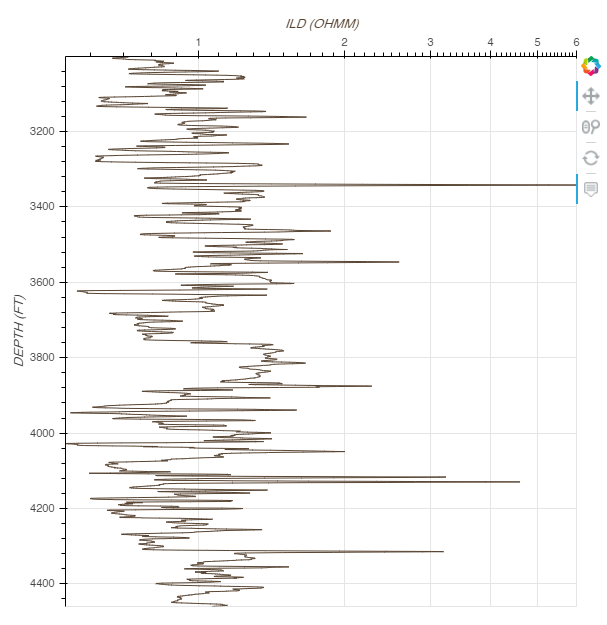


In [4]:
GR.y_range = Range1d(4300,4000)
GR.x_range= Range1d(40,100)
show (GR)

#### Display multiple logs
To add the multiple logs in a column, you can simply pass another log type that you want to show in a plot. 

In [5]:
fig=well.addplot('NPHI_LS', 'RHOB', 'GR')
show(fig)

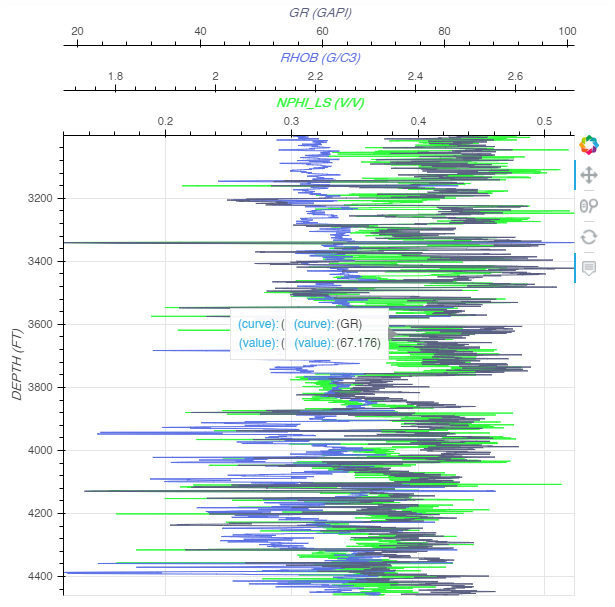

In [6]:
fig1=well.addplot('GR', 'CALI')
fig2=well.addplot('NPHI_LS', 'RHOB')
fig3=well.addplot('MSFL','ILD')
fig4=well.addplot('ILD', 'RHOB')

myLog=[fig1, fig2, fig3, fig4] #Combine all the column in a list

p=gridplot([myLog], sizing_mode='stretch_both')
# p=gridplot([[fig1, fig2, fig3, fig4]], sizing_mode='stretch_both') #You could also write this manually like this
show(p)

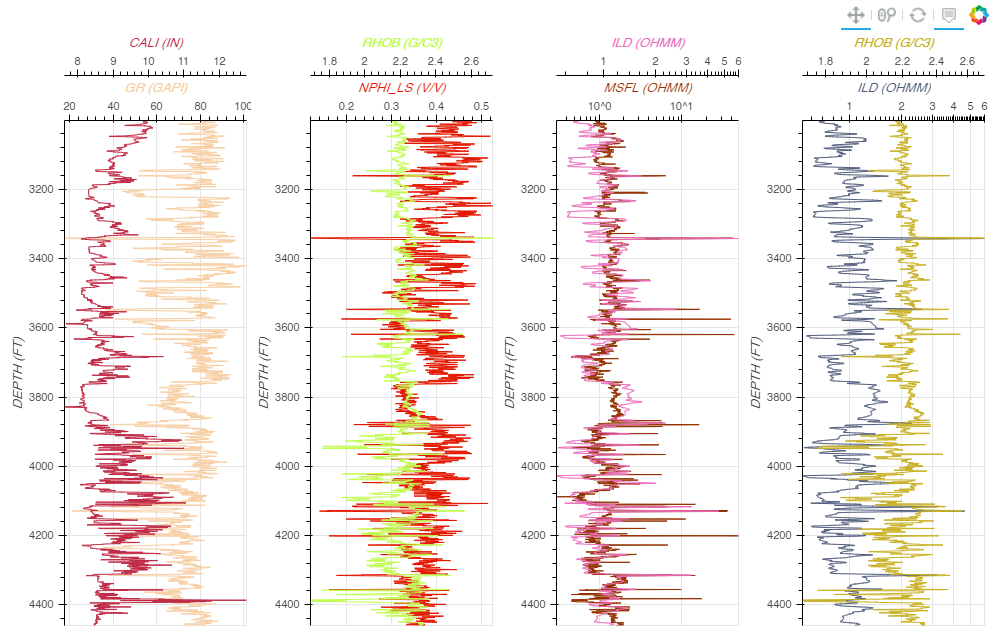

#### Sharing Y-axis
You could also connect the Y-axis (depth) of each or every logs by doing this simple code below:

In [7]:
# fig1.y_range = (4000,4500) #of course you could always have the option to specify the limit of your axis range
fig2.y_range = fig1.y_range
fig3.y_range = fig1.y_range
fig4.y_range = fig1.y_range
fig4.line(x=[0,100], y=[3200, 3200], color="red", line_width=2)

p=gridplot([myLog], sizing_mode='stretch_both')

show(p)

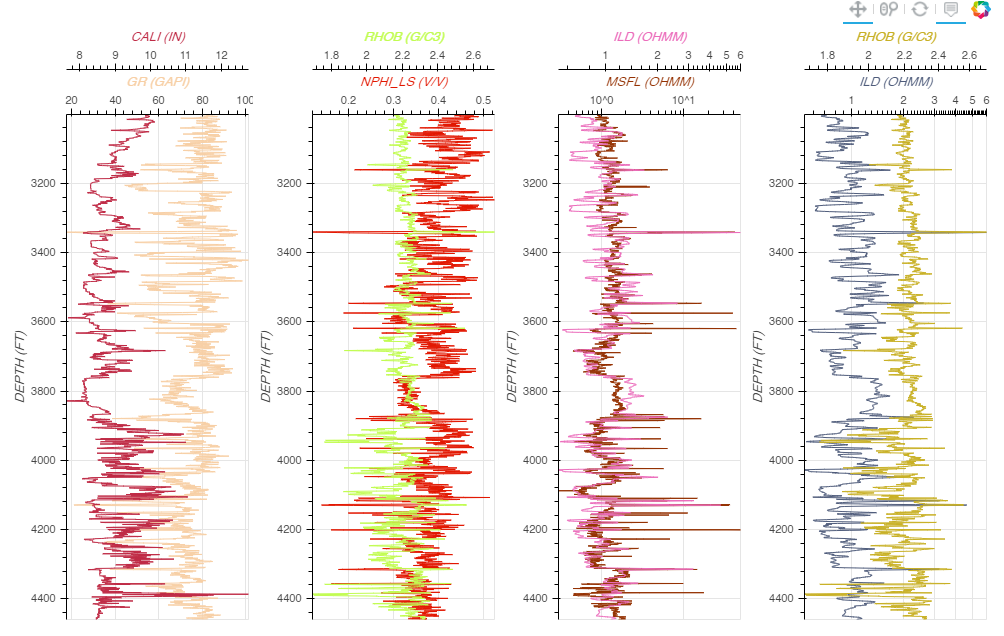

## output_file
The result could easily exported to html file for further purposes. You could specify the name of the html file, then rerun which plot that you would like to export.

In [8]:
output_file("GR plot.html")
show (GR)

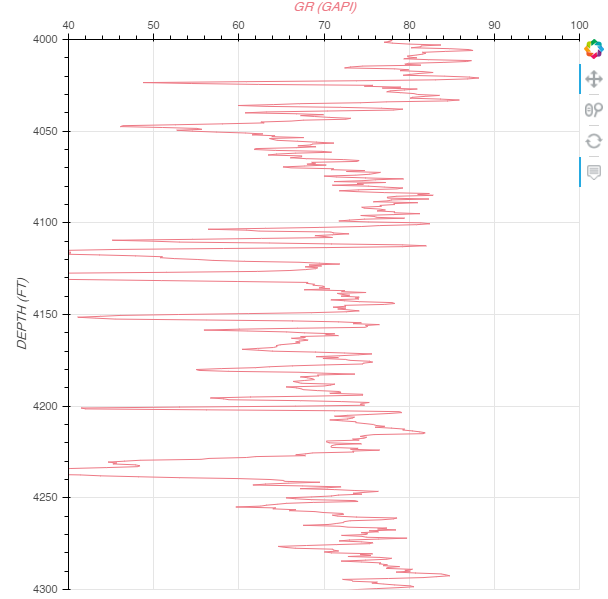

In [9]:
output_file("Well-1.html")
p=gridplot([myLog], sizing_mode='stretch_both')

show(p)

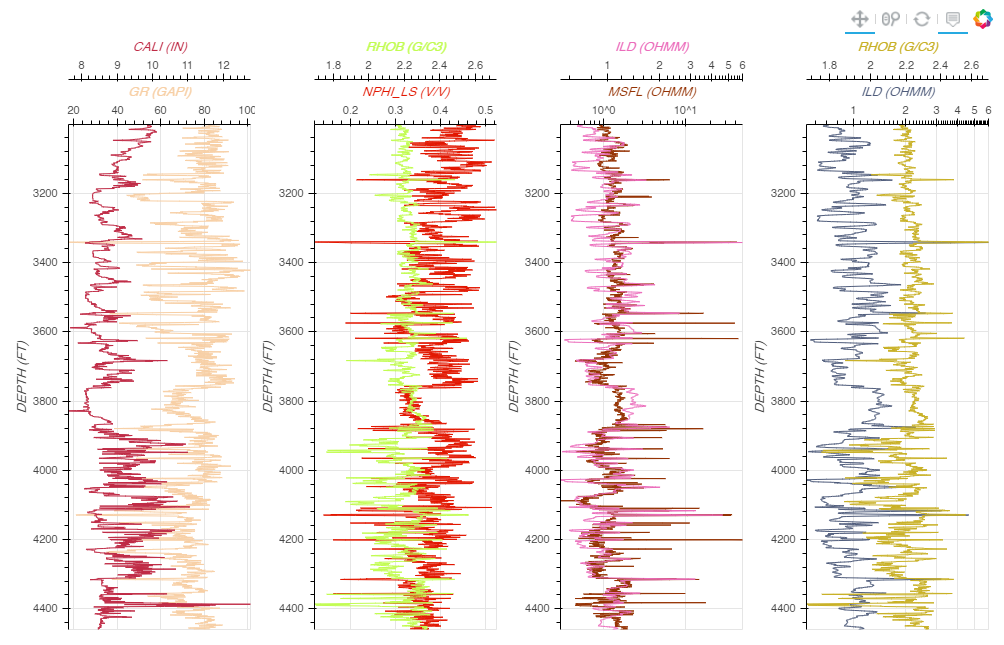